In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import polars as pl

In [3]:
oo9762 = pd.read_csv(
    "/ptmp/gshirsekar/variation/tmp/1001genomeReads/test/9762.shortreads.on.no9762PGGB_genotyping.vcf.genotypes.txt", sep = "\t",
    names = ["chr", "pos", "genotype"]
)

truth9762 = pd.read_csv(
    "/ptmp/gshirsekar/variation/tmp/1001genomeReads/test/9762_genotyping.vcf.genotypes.txt", sep = "\t",
    names = ["chr", "pos", "genotype"]
)

In [9]:
overlap = pd.merge(oo9762, truth9762, how = "inner", on = ['chr', 'pos'],)
overlap.head()

,chr,pos,genotype_x,genotype_y
0,at9852_1_chr1:0-33329944,3574,1/1,2/2
1,at9852_1_chr1:0-33329944,3583,0/0,1/1
2,at9852_1_chr1:0-33329944,3606,0/0,0/0
3,at9852_1_chr1:0-33329944,3612,0/0,1/1
4,at9852_1_chr1:0-33329944,3616,0/0,0/0


In [78]:
overlap01 = overlap[((overlap["genotype_x"]=="0/0")| 
        (overlap["genotype_x"]=="1/1")| 
        (overlap["genotype_x"]=="0/1")|
        (overlap["genotype_x"]==".")
        ) &
       ((overlap["genotype_y"]=="0/0")| 
        (overlap["genotype_y"]=="1/1")| 
        (overlap["genotype_y"]=="0/1")|
        (overlap["genotype_y"]==".")
        )]

In [79]:
def confusion_matrix(df: pd.DataFrame, col1: str, col2: str):
    """
    Given a dataframe with at least
    two categorical columns, create a 
    confusion matrix of the count of the columns
    cross-counts
    
    use like:
    
    >>> confusion_matrix(test_df, 'actual_label', 'predicted_label')
    """
    return (
            df
            .groupby([col1, col2])
            .size()
            .unstack(fill_value=0)
            )

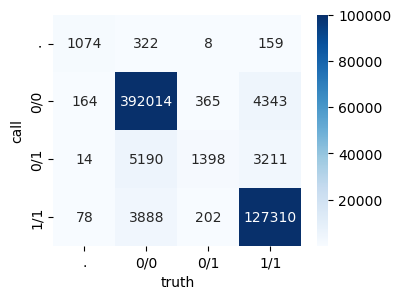

In [87]:
confMatrix_overlap = confusion_matrix(overlap01,"genotype_x", "genotype_y",) 
plt.figure(figsize = (4,3))
sns.set_palette("Blues", )
ax = sns.heatmap(confMatrix_overlap, annot=True, cmap = "Blues", fmt='d', vmax=100000)
ax.set(xlabel='truth', ylabel='call');


In [72]:
confMatrix_overlap

genotype_y,0/0,0/1,1/1
genotype_x,,,
0/0,392014,365,4343
0/1,5190,1398,3211
1/1,3888,202,127310


$$concordance_{00} = \frac{t_{00}}{t_{00}+f_{00}}$$
$$concordance_{01} = \frac{t_{01}}{t_{01}+f_{01}}$$
$$concordance_{11} = \frac{t_{11}}{t_{11}+f_{11}}$$

$$ weighted\ genotype \ concordance = \frac{(concordance_{00} +concordance_{01}+concordance_{11})}{3}$$

In [83]:
c00=392014/(392014+5190+3888)
c01=1398/(1398+202+365)
c11=127310/(127310+3211+4343)

In [84]:
weighted_gc = (c00+c01+c11)/3

In [85]:
print(weighted_gc)

0.877601729301586


In [86]:
weighted_gc_noHet = (c00+c11)/2
print(weighted_gc_noHet)

0.9606774031126842
